
# Imports and Magics

In [2]:
%matplotlib inline
import datetime
from utils.setup import *

In [3]:
data = pd.read_csv('/home_nfs/mcaitucoli-2047/Code/enedis/data/cleaned/data_cleaned.csv', index_col=0, parse_dates=True, dtype='float32')

# Pandas Profiling

In [3]:
import pandas_profiling

In [ ]:
profile = pandas_profiling.ProfileReport(train)
profile.to_file(outputfile="Enedis data profiling.html")

# Feature Drop

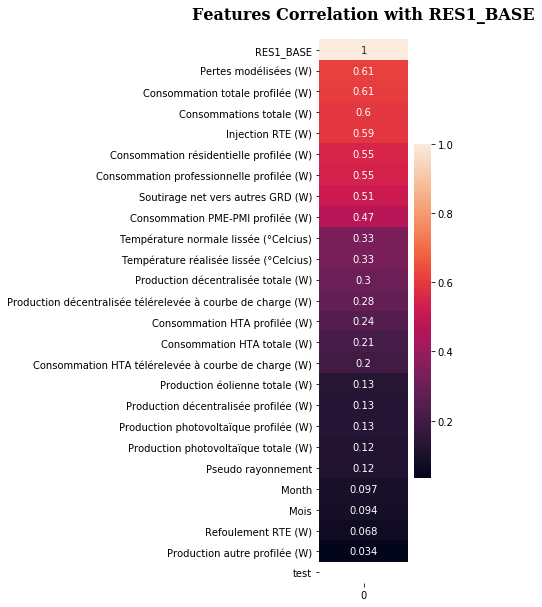

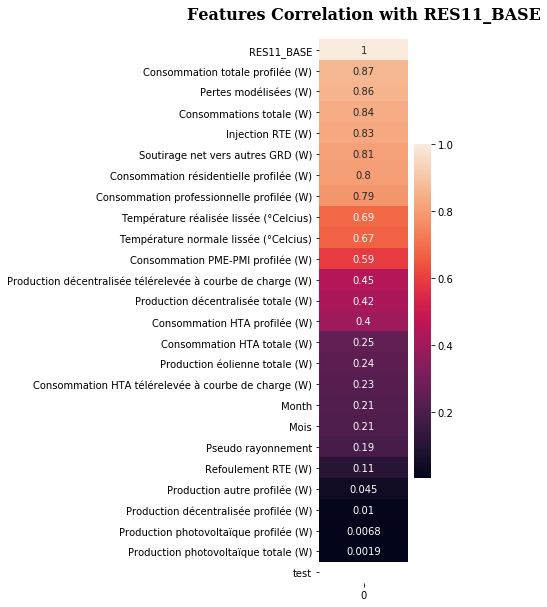

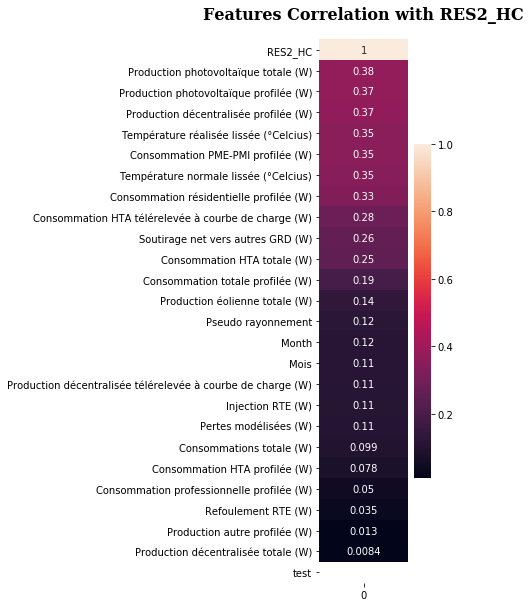

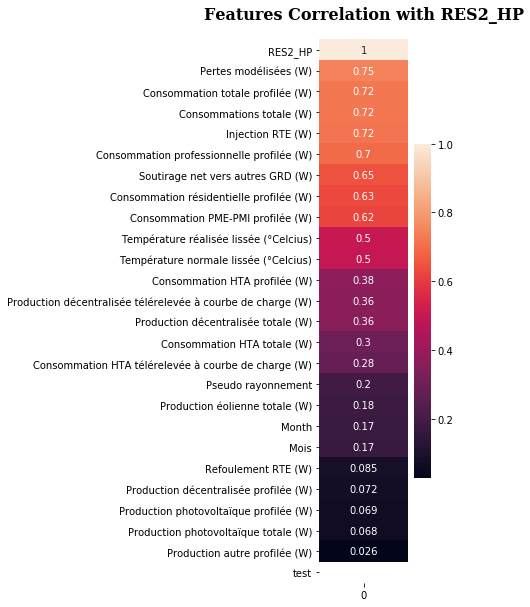

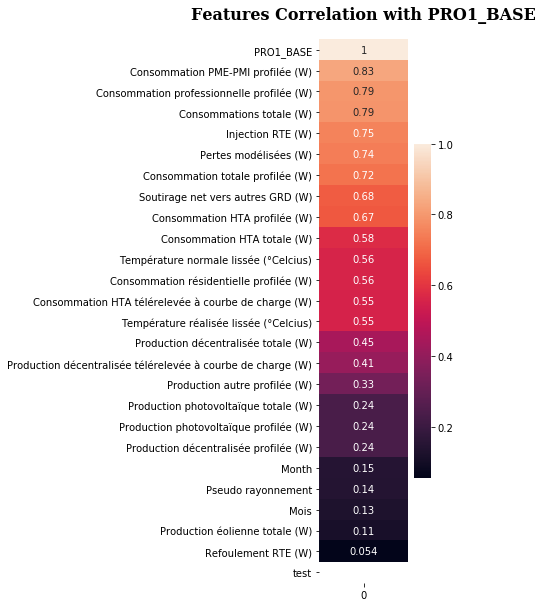

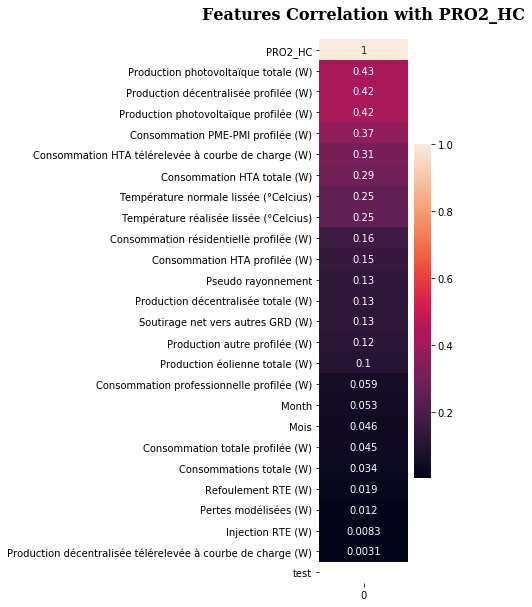

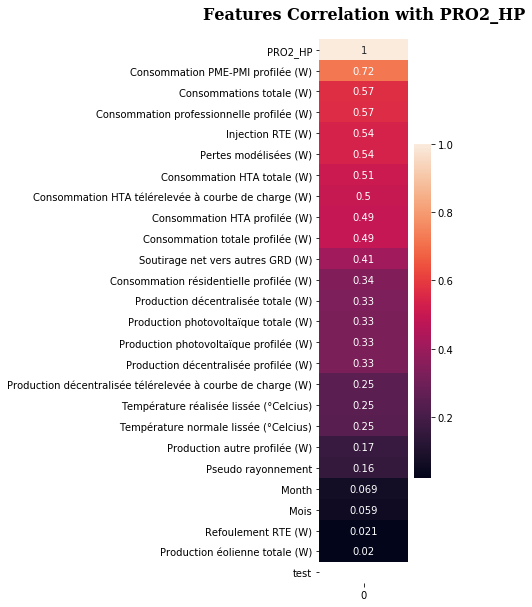

In [4]:
plot_feature_corr(data,TARGETS,True)

In [3]:
from solvay.centre_recherche.code.common.setup import *
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from predictions.toolbox.load.mlp_keras import MLP_keras
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pickle

def test_prediction(df_in, target, test_start, model='RandomForest', 
                    model_kwargs={'n_estimators': 10, 'max_depth': 5},
                    training_kwargs=None,
                    save_model=False, filename='model'):
    
    df = df_in.copy()
    df = df.dropna()
    X = df.drop(target, axis=1)
    y = df[target]
    
    if model == 'RandomForest':
        Model = RandomForestRegressor
    elif model == 'LinearRegression':
        Model = LinearRegression
    elif model == 'mlp_keras':
        Model = MLP_keras
    else:
        raise ValueError(("Model {} is not available. ".format(model) +
                          "Available models: " + 
                          "'RandomForest', 'LinearRegression', 'mlp_keras'"))
    if training_kwargs is None:
        training_kwargs = {}
    
    X_train, X_test, y_train, y_test = X[:test_start], X[test_start:], y[:test_start], y[test_start:]
    
    pipeline = make_pipeline(preprocessing.MinMaxScaler(),
                             Model(**model_kwargs))
    
    clf = Model(**model_kwargs)
    clf.fit(X_train, y_train)
#    clf = clf.best_estimator_
    clf.fit(X_train, y_train, **training_kwargs)
    pred_train = pd.Series(clf.predict(X_train).ravel(), index=X_train.index)
    pred_test = pd.Series(clf.predict(X_test).ravel(), index=X_test.index)
        
    print('{} prediction : \n'.format(target))
    print('RMSE train', mean_squared_error(y_train, pred_train)**0.5)
    print('RMSE test', mean_squared_error(y_test, pred_test)**0.5)    
    print ('R²_train', clf.score(X_train, y_train))    
    print ('R²_test', clf.score(X_test, y_test))
    plt.figure()
    plt.xlabel('Measured')
    plt.ylabel('Prediction')
    plt.scatter(y_train, pred_train, alpha=0.3, label='train')
    plt.scatter(y_test, pred_test, alpha=0.3, label='test')
    plt.show()
    
    
    plt.figure()
    plt.ylabel(target)
    plt.plot(y_train, label='truth train')
    plt.plot(pred_train, label='prediction train')
    plt.plot(y_test, label='truth test')
    plt.plot(pred_test, label='prediction test')
    plt.legend()
    plt.show()
    
    
    if save_model:
        with open('{}_model.p'.format(filename), 'wb') as file:
            pickle.dump(clf, file)
        print('Model Saved')
    
    return {'df_test':pd.DataFrame({'y_test': y_test, 'pred':pd.Series(pred_test)}, index=y_test.index),
            'df_all':pd.DataFrame({'y_train':y_train, 'pred':pd.Series(pred_train)}, index=y_train.index),
            'model':clf}



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[WARNING] -- mcaitucoli -- DataProcessing.tools.filter -- Functions in this module have not been properly tested yet
[WARNING] -- mcaitucoli -- root -- papermill package not found. External notebook cant be executed
[INFO] -- mcaitucoli -- root -- DIR_ROOT set up using default CLIENTPATH = /volume1/Clients
[INFO] -- mcaitucoli -- common -- User : mcaitucoli
[INFO] -- mcaitucoli -- common -- Date : 2019-07-03 02:47:38.932538


Not able to import rainfow_cycles
Not able to import rainfow_cycles
Not able to import rainfow_cycles


/usr/lib64/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
def features_creation(df, target):
        
    # Date Time Features
    ref_date = pd.to_datetime('2013-09-01 00:00')
    
    for i in range(24):
        df['hour_%s' % i] = (df.index.hour == i) * 1
    for i in range(1,13):
        df['month_%s' % i] = (df.index.month == i) * 1
    for i in range(7):
        df['week_day_%s' % i] = (df.index.weekday == i) * 1
    
#     # Peak Hours
    
#     df['year'] = pd.Series(df.index.year.values)
    
#     for typ in ['P', 'HPH', 'HCH', 'HPE', 'HCE']:
#         df[typ] = 0
    
#     for year in range(2013,2019):
        
#         df.loc[str(year), 'P'] = (df.index.weekday.isin(list(range(6)))) & ((df[str(year)].index.date < datetime.date(year, 3, 1)) | (df[str(year)].index.date >= datetime.date(year, 11, 1))) & (((datetime.time(9, 0)<=df[str(year)].index.time) & (df[str(year)].index.time<=datetime.time(11, 0))) | ((datetime.time(18, 0)<=df[str(year)].index.time) & (df[str(year)].index.time<=datetime.time(20, 0))))
        
#         df.loc[str(year), 'HPH'] = (df.index.weekday.isin(list(range(6)))) & ((df[str(year)].index.date < datetime.date(year, 4, 1)) | (df[str(year)].index.date >= datetime.date(year, 10, 1))) & (~df[str(year)]['P']) & ((datetime.time(6, 0)>=df[str(year)].index.time) & (df[str(year)].index.time<datetime.time(22, 0)))
        
#         df.loc[str(year), 'HCH'] = ((df[str(year)].index.date < datetime.date(year, 4, 1)) | (df[str(year)].index.date >= datetime.date(year, 10, 1))) & ((df.index.weekday == 6) | ((datetime.time(6, 0)<df[str(year)].index.time) & (df[str(year)].index.time>=datetime.time(22, 0))))
        
#         df.loc[str(year), 'HPE'] = (df.index.weekday.isin(list(range(6)))) & ((df[str(year)].index.date >= datetime.date(year, 4, 1)) | (df[str(year)].index.date < datetime.date(year, 10, 1))) & (~df[str(year)]['P']) & ((datetime.time(6, 0)>=df[str(year)].index.time) & (df[str(year)].index.time<datetime.time(22, 0)))
        
#         df.loc[str(year), 'HCE'] = ((df[str(year)].index.date >= datetime.date(year, 4, 1)) | (df[str(year)].index.date < datetime.date(year, 10, 1))) & ((df.index.weekday == 6) | ((datetime.time(6, 0)<df[str(year)].index.time) & (df[str(year)].index.time>=datetime.time(22, 0))))
    
    
    return df.dropna

In [6]:
FEAT_DICT = dict.fromkeys(TARGETS)
FEAT_DICT['RES1_BASE'] = ['Consommation totale profilée (W)']
FEAT_DICT['RES11_BASE'] = ['Consommation totale profilée (W)']
FEAT_DICT['RES2_HC'] = ['Production décentralisée profilée (W)']
FEAT_DICT['RES2_HP'] = ['Pertes modélisées (W)']
FEAT_DICT['PRO1_BASE'] = ['Consommation PME-PMI profilée (W)']
FEAT_DICT['PRO2_HC'] = ['Production décentralisée profilée (W)']
FEAT_DICT['PRO2_HP'] = ['Consommation PME-PMI profilée (W)']

for key in list(FEAT_DICT.keys()):
    to_add = ['Température réalisée lissée (°Celcius)'] + ['hour_%s' % i for i in range(24)] + ['month_%s' % i for i in range(1,13)] 
    FEAT_DICT[key] += to_add

# Pred

In [36]:
TARGET = 'RES1_BASE'
test_start = '2017-12'

features = FEAT_DICT[TARGET]
df_feat = features_creation(train, TARGET)
df_feat = df_feat[FEAT_DICT[TARGET] + [TARGET]]

In [39]:
train[['P', 'HPH']]

,P,HPH
Horodate,,
2013-10-13 00:00:00,False,False
2013-10-13 00:30:00,False,False
2013-10-13 01:00:00,False,False
2013-10-13 01:30:00,False,False
2013-10-13 02:00:00,False,False
2013-10-13 02:30:00,False,False
2013-10-13 03:00:00,False,False
2013-10-13 03:30:00,False,False
2013-10-13 04:00:00,False,False


##  LSTM

In [8]:
from solvay.centre_recherche.code.common.setup import *
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from predictions.toolbox.load.mlp_keras import MLP_keras
from predictions.toolbox.load.lstm import LSTM_keras
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pickle

def test_prediction(df_in, target, test_start, model='RandomForest', 
                    model_kwargs={'n_estimators': 10, 'max_depth': 5},
                    training_kwargs=None,
                    save_model=False, filename='model'):
    
    df = df_in.copy()
    df = df.dropna()
    X = df.drop(target, axis=1)
    y = pd.DataFrame(df[target], index=X.index)
    
    scaler_X = preprocessing.MinMaxScaler()
    scaler_X = scaler_X.fit(X)
    
    scaler_y = preprocessing.MinMaxScaler()
    scaler_y = scaler_y.fit(y)
    
    if model == 'RandomForest':
        Model = RandomForestRegressor
    elif model == 'LinearRegression':
        Model = LinearRegression
    elif model == 'mlp_keras':
        Model = MLP_keras
    elif model == 'lstm':
        Model = LSTM_keras
    else:
        raise ValueError(("Model {} is not available. ".format(model) +
                          "Available models: " + 
                          "'RandomForest', 'LinearRegression', 'mlp_keras'"))
    if training_kwargs is None:
        training_kwargs = {}
    
    X_train, X_test, y_train, y_test = X[:test_start], X[test_start:], y[:test_start], y[test_start:]
    
    X_train = scaler_X.transform(X_train)
    X_test = scaler_X.transform(X_test)
    
    y_train = scaler_y.transform(y_train)
    y_test = scaler_y.transform(y_test)
    

    
    clf = Model(**model_kwargs)
    clf.fit(X_train, y_train)
#    clf = clf.best_estimator_
    clf.fit(X_train, y_train, **training_kwargs)
    pred_train = pd.Series(clf.predict(X_train).ravel(), index=X[:test_start].index)
    pred_test = pd.Series(clf.predict(X_test).ravel(), index=X[test_start:].index)
        
    print('{} prediction : \n'.format(target))
    print('RMSE train', mean_squared_error(y_train, pred_train)**0.5)
    print('RMSE test', mean_squared_error(y_test, pred_test)**0.5)    
    print ('R²_train', clf.score(X_train, y_train))    
    print ('R²_test', clf.score(X_test, y_test))
    plt.figure()
    plt.xlabel('Measured')
    plt.ylabel('Prediction')
    plt.scatter(y_train, pred_train, alpha=0.3, label='train')
    plt.scatter(y_test, pred_test, alpha=0.3, label='test')
    plt.show()
    
    
    plt.figure()
    plt.ylabel(target)
    plt.plot(y_train, label='truth train')
    plt.plot(pred_train, label='prediction train')
    plt.plot(y_test, label='truth test')
    plt.plot(pred_test, label='prediction test')
    plt.legend()
    plt.show()
    
    
    if save_model:
        with open('{}_model.p'.format(filename), 'wb') as file:
            pickle.dump(clf, file)
        print('Model Saved')
#     return {'df_test':pd.DataFrame({'y_test': y_test.T, 'pred':pd.Series(pred_test)}, index=y[test_start:].index),
#             'df_all':pd.DataFrame({'y_train':y_train, 'pred':pd.Series(pred_train)}, index=y[:test_start].index),
#             'model':clf}

[WARNING] -- mcaitucoli -- tensorflow -- From /usr/lib64/python3.5/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
[WARNING] -- mcaitucoli -- tensorflow -- From /home_nfs/mcaitucoli-2047/.local/lib64/python3.5/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
[WARNING] -- mcaitucoli -- tensorflow -- From /usr/lib64/python3.5/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


RES1_BASE prediction : 

RMSE train 0.6909543758770265
RMSE test 0.7251421927845194
R²_train -18.228865828556987
R²_test -31.73109694132729


<IPython.core.display.Javascript object>


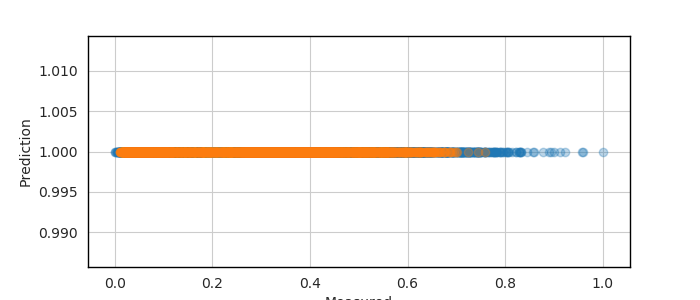

<IPython.core.display.Javascript object>


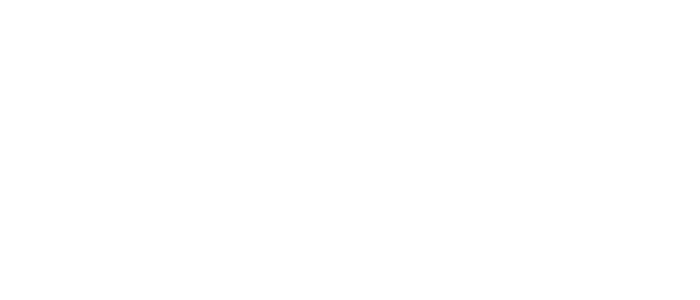

/usr/lib64/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [9]:
res = test_prediction(
    df_feat[features + [TARGET]], 
    target=TARGET,
    test_start=test_start,
    model='lstm',
    model_kwargs={'loss': 'mae', 
                  'input_dim': len(features),
                  'output_dim': 1,
                  'n_neurons': 10,
                  'drop_frac':0.8,
                  'rec_dpout':0.8},
    training_kwargs={'epochs': 10},
    save_model=False
)

## Random Forest

/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:55: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:57: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RES1_BASE prediction : 

RMSE train 0.0417181717112488
RMSE test 0.050032743796754084
R²_train 0.9521233279482394
R²_test 0.9071020700780306


<IPython.core.display.Javascript object>


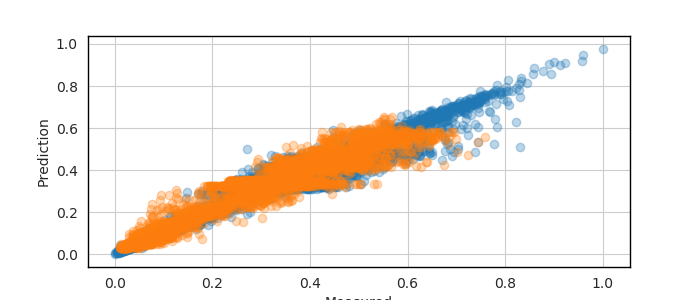

<IPython.core.display.Javascript object>


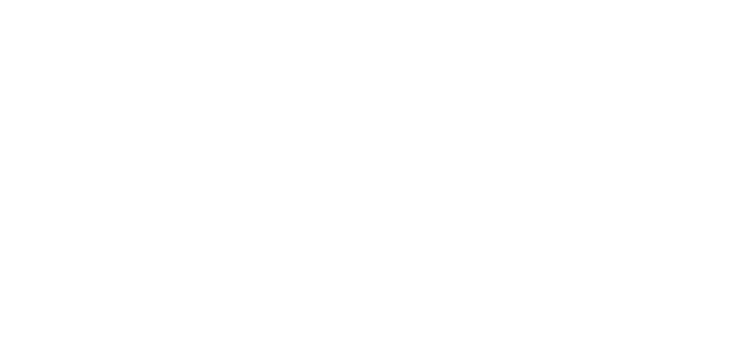

In [46]:
features = FEAT_DICT[TARGET]

res = test_prediction(
    df_feat[features + [TARGET]], 
    target=TARGET,
    test_start=test_start,
    model='RandomForest',
    model_kwargs={'n_estimators': 10, 'max_depth': 20, 'n_jobs': -1},
    save_model=False
)

In [26]:
from predictions.toolbox.hyperopt.hyperopt import scan_param, ranking
from predictions.config.hyperopt_model_config import regressor_config_dict

In [85]:
model_grid = {'n_estimators': range(10, 25, 5),
 'min_samples_split': range(2, 10, 5),
 'min_samples_leaf': range(1, 10, 5),
 'max_depth': range(8, 20, 2),
 'bootstrap': [True, False]}

In [86]:
scan_hist = scan_param(model_name='random_forest',
                       model_grid=model_grid,
                       training_grid={},
                       frac=1,
                       X=df_feat[features],
                       t=df_feat[[TARGET]])  

Testing 144 out of 144 possible combinations.
Model Iteration #0 to #9
Model Iteration #10 to #19
Model Iteration #20 to #29
Model Iteration #30 to #39
Model Iteration #40 to #49
Model Iteration #50 to #59
Model Iteration #60 to #69
Model Iteration #70 to #79
Model Iteration #80 to #89
Model Iteration #90 to #99
Model Iteration #100 to #109
Model Iteration #110 to #119
Model Iteration #120 to #129
Model Iteration #130 to #139
Model Iteration #140 to #149


In [87]:
rank_df = ranking(scan_hist, ascending=True)['sklearn.ensemble.RandomForestRegressor']

In [88]:
corr = rank_df[list(model_grid.keys()) + ['perf']].corr()
corr

,min_samples_leaf,min_samples_split,max_depth,n_estimators,bootstrap,perf
min_samples_leaf,1.000000e+00,3.768222e-17,0.707107,-6.123724e-01,5.000000e-01,0.793911
min_samples_split,3.768222e-17,1.000000e+00,0.333333,-5.773503e-01,1.570092e-17,0.310877
max_depth,7.071068e-01,3.333333e-01,1.000000,-5.773503e-01,0.000000e+00,0.986764
n_estimators,-6.123724e-01,-5.773503e-01,-0.577350,1.000000e+00,6.798700e-18,-0.581665
bootstrap,5.000000e-01,1.570092e-17,0.000000,6.798700e-18,1.000000e+00,0.158545
perf,7.939113e-01,3.108771e-01,0.986764,-5.816649e-01,1.585446e-01,1.000000


<IPython.core.display.Javascript object>


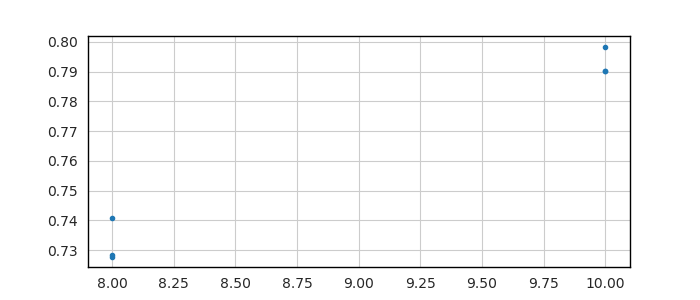

In [89]:
plt.figure()
plt.plot(rank_df['max_depth'], rank_df['perf'], '.')

In [84]:
rank_df.iloc[-1, :]['perf']

0.9128345976269114

In [82]:
best_conf = rank_df.iloc[-1, :]['model_configs']

RES1_BASE prediction : 

RMSE train 0.08456681298862533
RMSE test 0.08314814665983311
R²_train 0.934590636646958
R²_test 0.8440071435235716


<IPython.core.display.Javascript object>


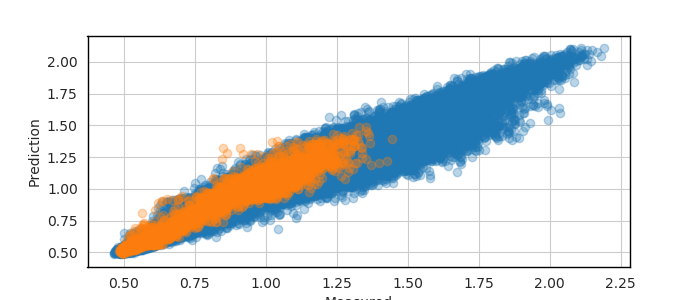

<IPython.core.display.Javascript object>


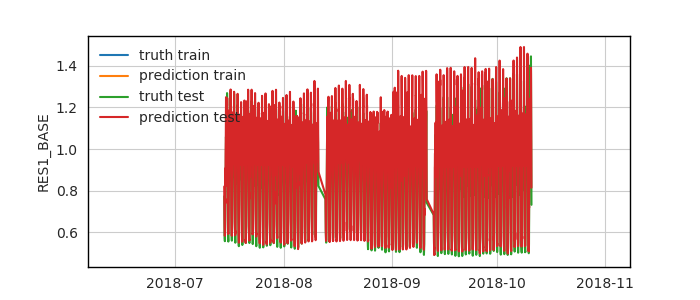

In [83]:
features = FEAT_DICT[TARGET]

res = test_prediction(
    df_feat[features + [TARGET]], 
    target=TARGET,
    test_start=test_start,
    model='RandomForest',
    model_kwargs=best_conf,
    save_model=False
)

## Keras

[WARNING] -- mcaitucoli -- tensorflow -- From /usr/lib64/python3.5/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
[WARNING] -- mcaitucoli -- tensorflow -- From /usr/lib64/python3.5/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


RES1_BASE prediction : 

RMSE train 0.33109010369654035
RMSE test 0.2670836703423032
R²_train -0.6470167291815279
R²_test -1.0483062957960463


<IPython.core.display.Javascript object>


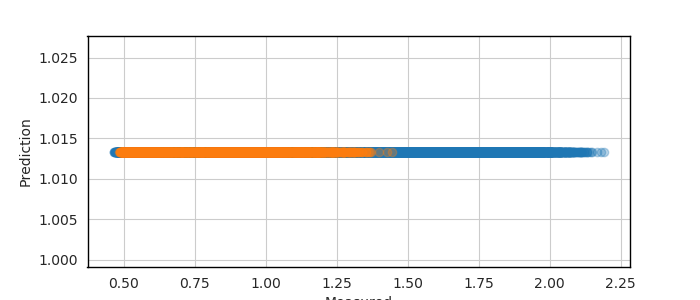

<IPython.core.display.Javascript object>


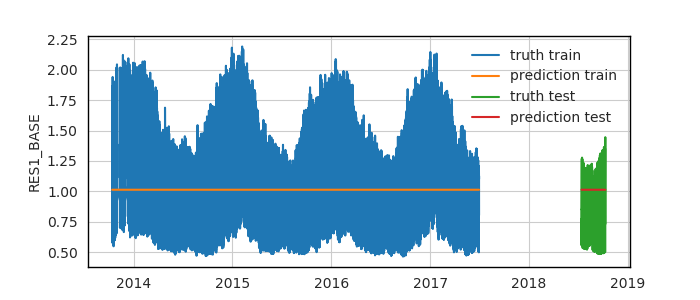

In [92]:
res = test_prediction(
    df_feat[features + [TARGET]], 
    target=TARGET,
    test_start=test_start,
    model='mlp_keras',
    model_kwargs={'loss': 'mae', 
                  'input_dim': len(features),
                  'output_dim': 1,
                  'n_neurons': [10]},
    training_kwargs={'epochs': 10},
    save_model=False
)

In [3]:
def get_hour(date):

    hour = date.hour
    minu = date.minute/60
    res = hour + minu
    return res

In [4]:
train['Hour'] = pd.Series(train.index).apply(get_hour).values

In [5]:
arrays = [np.array([48*[i]for i in range(1,13)]).reshape(1,12*48).tolist()[0], list(np.linspace(0, 23.5, 48))*12]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['Month', 'Hour'])

df_mean_tar = pd.DataFrame(np.array([np.array([train[train['Month']==i].groupby('Hour').mean()[tar].values for i in range(1,13)]).reshape(12*48) for tar in TARGETS]).T, index=index, columns=TARGETS)

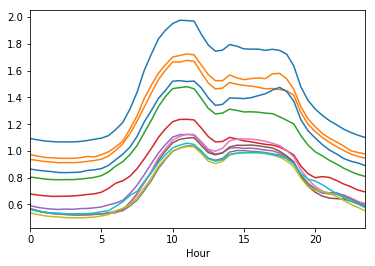

In [8]:
for i in range(1,13):
    df_mean_tar.loc[i]['PRO1_BASE'].plot()

In [9]:
train['RES1_BASE_mean'] = 0
for i in range(len(train)):
    train['RES1_BASE_mean'].iloc[i] = df_mean_tar.loc[(train['Month'].iloc[i],train['Hour'].iloc[i])]['RES11_BASE']
    print(i)

/usr/lib64/python3.5/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093


limit_output extension: Maximum message size of 10000 exceeded with 10093 characters

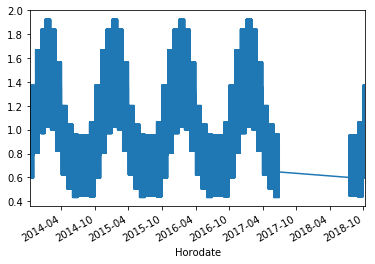

In [12]:
train['RES1_BASE_mean'].plot()

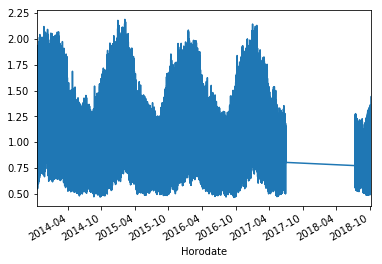

In [13]:
train['RES1_BASE'].plot()

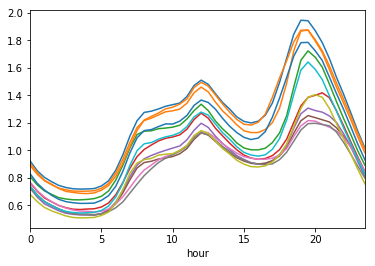

In [182]:
for i in range(1,13):
    train[train['Mois']==i].groupby('hour').mean()['RES1_BASE'].plot()

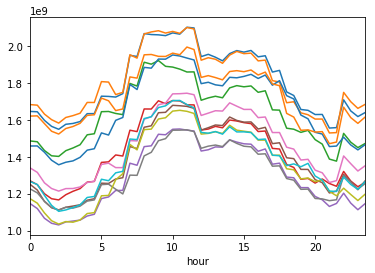

In [86]:
for i in range(1,13):
    train[train['Mois']==i].groupby('hour').mean()['Consommation HTA profilée (W)'].plot()

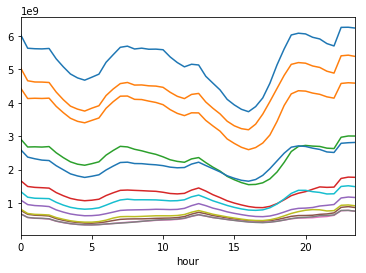

In [79]:
for i in range(1,13):
    cons = train[train['Mois']==i].groupby('hour').mean()['Consommation résidentielle profilée (W)']
    temp = train[train['Mois']==i].groupby('hour').mean()['Température normale lissée (°Celcius)']
    (cons/temp).plot()

In [70]:
%matplotlib inline

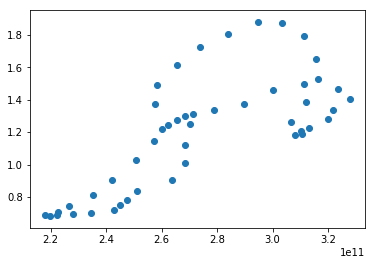

In [75]:
cons = train[train['Mois']==i].groupby('hour').mean()['Consommations totale (W)']
temp = train[train['Mois']==i].groupby('hour').mean()['Température normale lissée (°Celcius)']
tar = train[train['Mois']==i].groupby('hour').mean()['RES1_BASE']
plt.figure()
plt.scatter(temp*cons, tar)
plt.show()

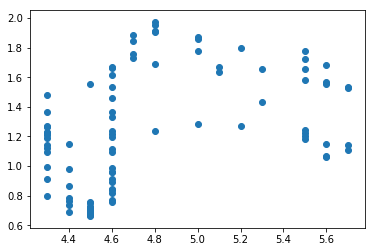

In [45]:
plt.figure()
plt.scatter(train['2016-01-02':'2016-01-03']['Température normale lissée (°Celcius)'], train['2016-01-02':'2016-01-03']['RES1_BASE'])

In [ ]:
for i in range(1,13):
    train[train['Mois']==i].groupby('hour').mean()['Température réalisée lissée (°Celcius)'].plot()

# Features

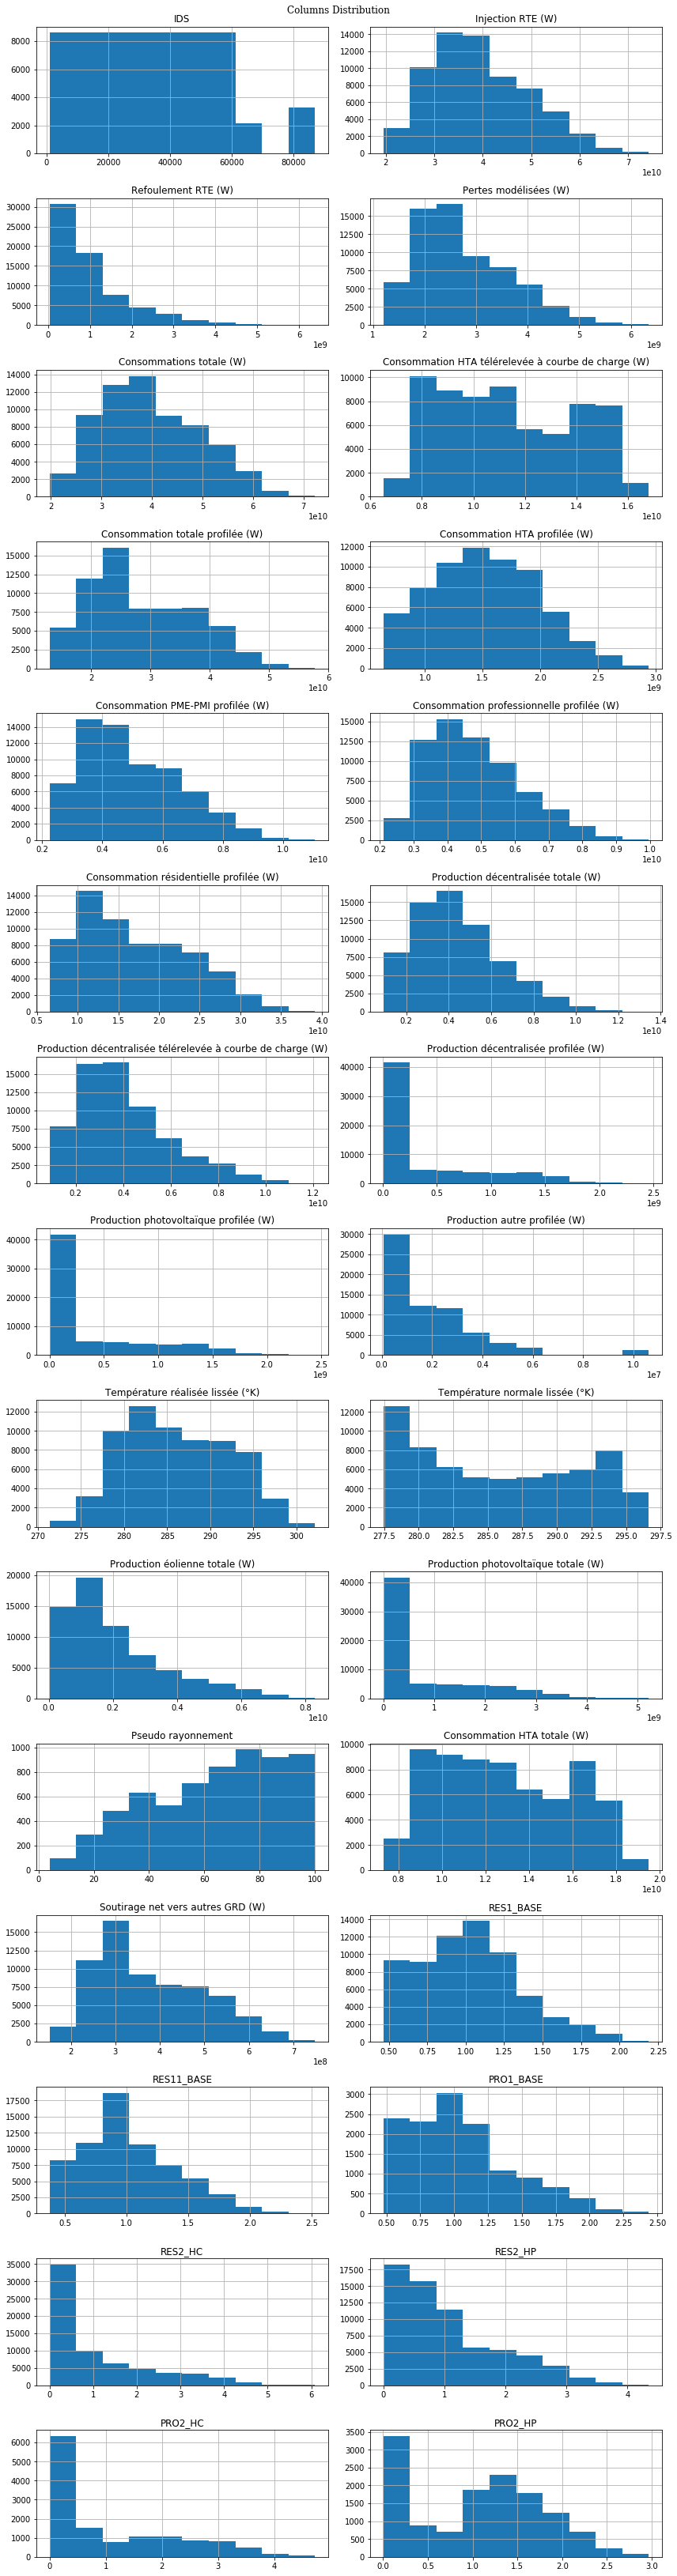

In [8]:
hist_plot(train)

# Correlations

## Features Correlation with Targets

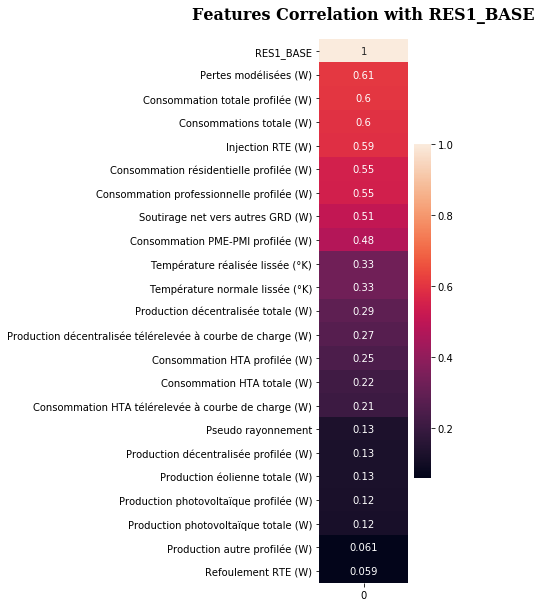

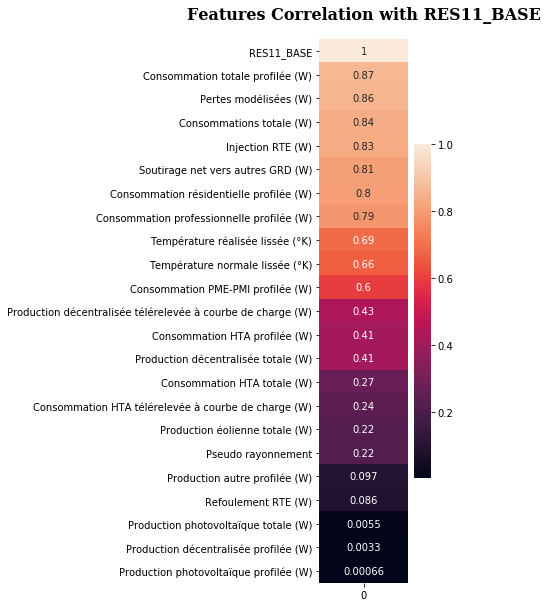

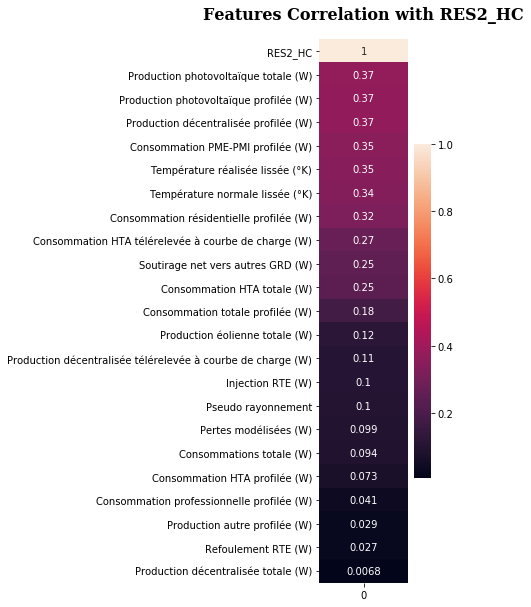

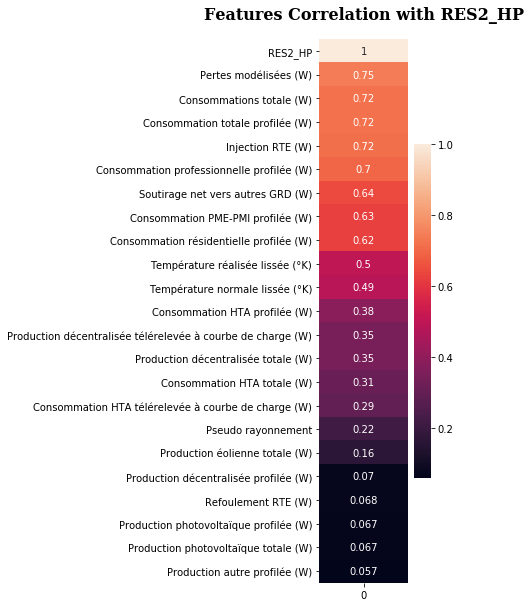

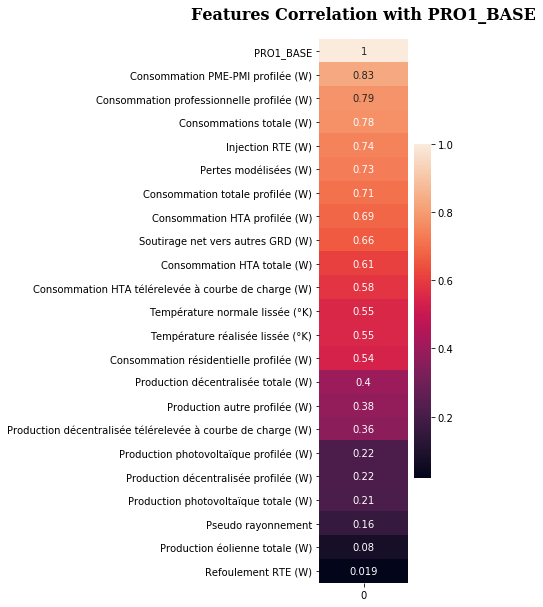

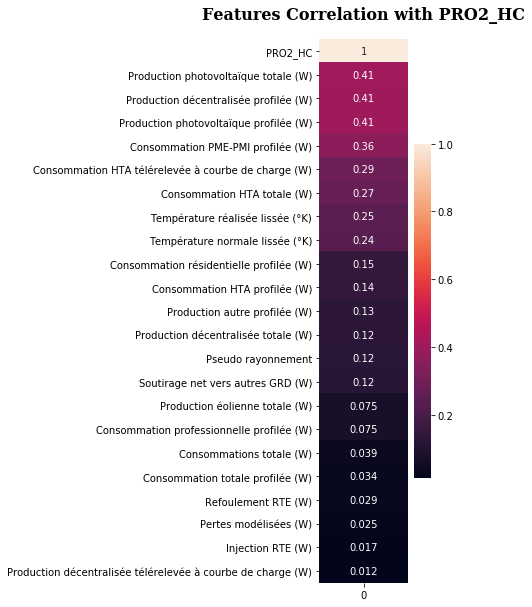

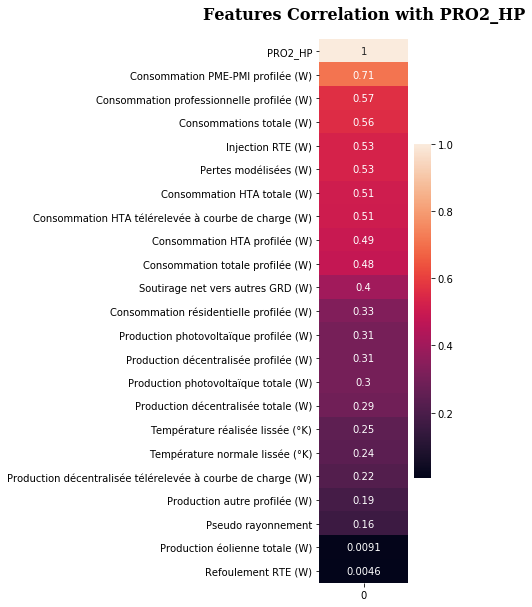

In [10]:
plot_feature_corr(train,TARGETS,True)

## Features Inter Correlation

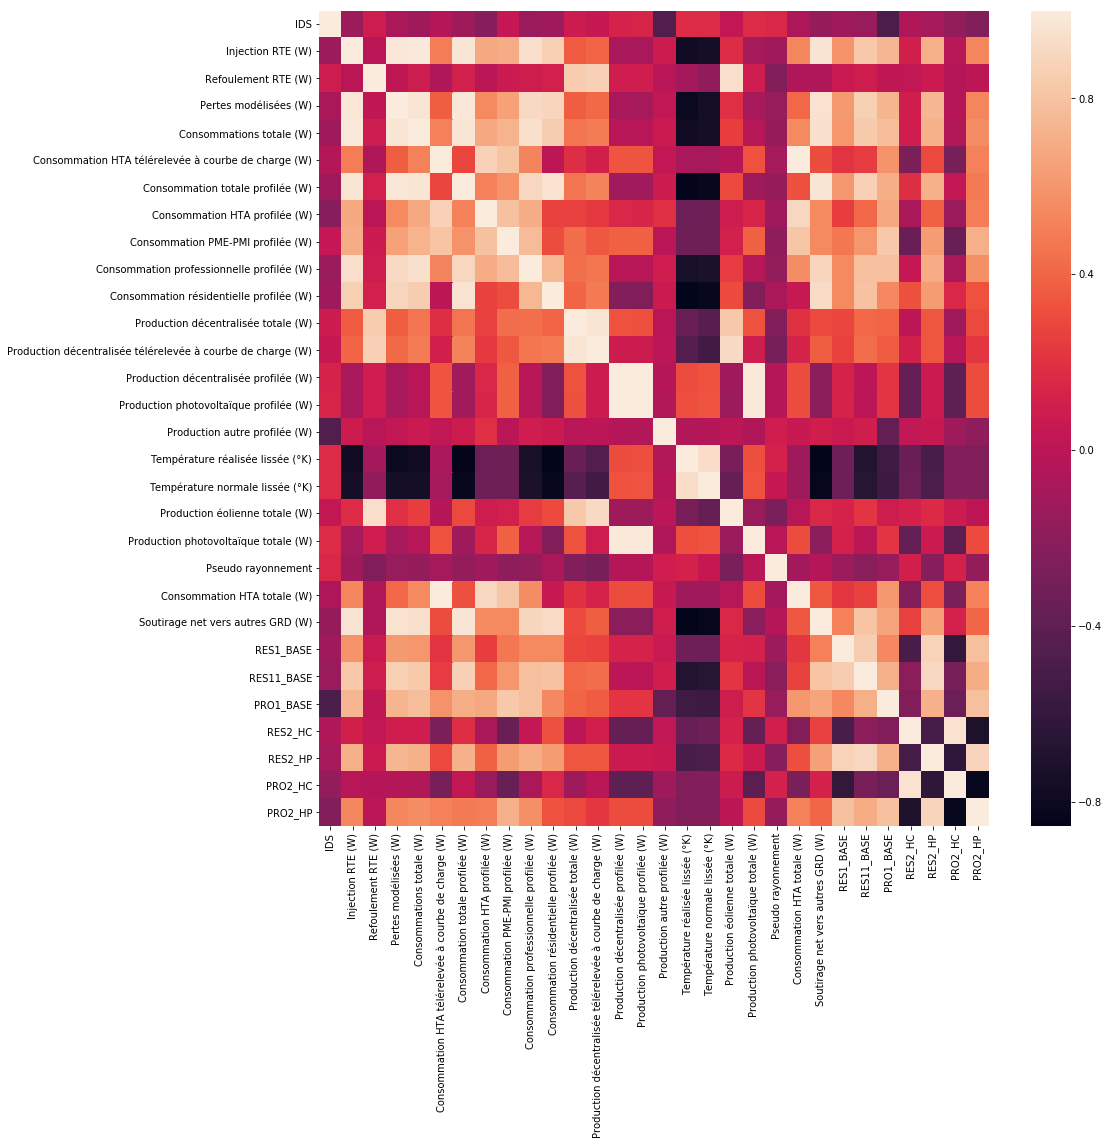

In [11]:
corr_matrix(train, True)

We can see that a lot of features are highly correlated with each other, it creates unnecessary complexity. We will have to delete some of them without fearing a lot of information loss.

# Time Series Analysis

## Simple plot

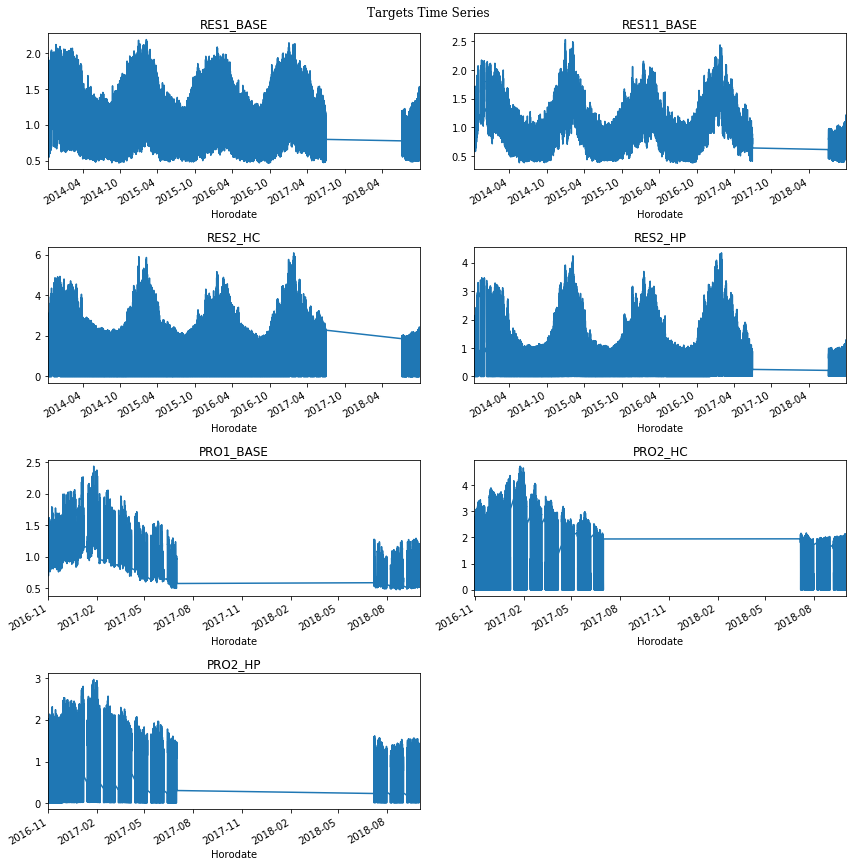

In [12]:
ts_simple_plot(train, TARGETS)